In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.spatial #used to find the distance 
from collections import Counter #For counting the occurances 
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=45, test_size=0.2)

In [4]:
#Euclidean

In [11]:
class KNN:

    def __init__(self, k):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def distance(self, X1, X2):
        distance = scipy.spatial.distance.euclidean(X1, X2)#to find the distance 
        return distance 
    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            val = []
            for j in range(len(X_train)):
                #Calculate distances between the current test point and all training points
                dist = scipy.spatial.distance.euclidean(X_train[j] , X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                val.append(y_train[j])
            ans = Counter(val).most_common(1)[0][0]
            final_output.append(ans)
        return final_output
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [20]:
from sklearn.metrics import accuracy_score
a=[]
# Loop through different values of k from 1 to 99
for i in range(1,100):
    clf = KNN(i)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    a.append(accuracy_score(y_test, prediction))

In [23]:
a

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667

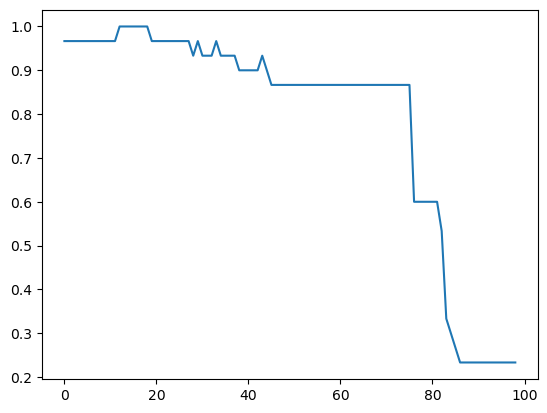

In [22]:
plt.plot(a)
plt.show()

In [9]:
max(a)

1.0